In [3]:
!pip install pandas matplotlib sqlalchemy psycopg2 mysql-connector-python

# Importing and reading URL

In [5]:
import pandas as pd
url = 'https://gist.githubusercontent.com/aishwarya8615/d2107f828d3f904839cbcb7eaa85bd04/raw/healthcare-dataset-stroke-data.csv'
data = pd.read_csv(url)
subset_data = data.iloc[:, :5]
print(data.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


# Connecting to the RDS

In [7]:
import pandas as pd
import mysql.connector
from mysql.connector import Error
from sqlalchemy import create_engine, text

In [ ]:
url = 'https://gist.githubusercontent.com/aishwarya8615/d2107f828d3f904839cbcb7eaa85bd04/raw/healthcare-dataset-stroke-data.csv'
data = pd.read_csv(url)

username = 'sambad'
password = 'rupakheti'
host = 'strokeproject.ch6yy8ggo7s7.us-east-2.rds.amazonaws.com'
port = 5432
dbname = 'postgres'

engine = create_engine(f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{dbname}')

try:
    with engine.connect() as connection:
        print("Connected to RDS successfully!")

Connected to RDS successfully!


# uploadiing data to the RDS

In [16]:
import pandas as pd
from sqlalchemy import create_engine, text

# Load the data from the CSV URL
url = 'https://gist.githubusercontent.com/aishwarya8615/d2107f828d3f904839cbcb7eaa85bd04/raw/healthcare-dataset-stroke-data.csv'
data = pd.read_csv(url)

# Database connection details
username = 'sambad'
password = 'rupakheti'
host = 'strokeproject.ch6yy8ggo7s7.us-east-2.rds.amazonaws.com'
port = 5432
dbname = 'postgres'

# Create the connection string for the database
engine = create_engine(f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{dbname}')

# Connect to the database
try:
    with engine.connect() as connection:
        print("Connected to RDS successfully!")

        # Create table if it doesn't exist
        create_table_query = """
        CREATE TABLE IF NOT EXISTS StrokeData (
            id SERIAL PRIMARY KEY,
            gender VARCHAR(10),
            age FLOAT,
            hypertension INT,
            heart_disease INT,
            ever_married VARCHAR(5),
            work_type VARCHAR(50),
            Residence_type VARCHAR(10),
            avg_glucose_level FLOAT,
            bmi FLOAT,
            smoking_status VARCHAR(20),
            stroke INT
        )
        """
        connection.execute(text(create_table_query))  # Corrected indentation

        # Loop through each row and insert the data into the table
        for _, row in data.iterrows():
            insert_query = """
            INSERT INTO StrokeData (gender, age, hypertension, heart_disease, ever_married, work_type, 
                                    Residence_type, avg_glucose_level, bmi, smoking_status, stroke)
            VALUES (:gender, :age, :hypertension, :heart_disease, :ever_married, :work_type, 
                    :Residence_type, :avg_glucose_level, :bmi, :smoking_status, :stroke)
            """
            connection.execute(text(insert_query), {
                'gender': row['gender'],
                'age': row['age'],
                'hypertension': row['hypertension'],
                'heart_disease': row['heart_disease'],
                'ever_married': row['ever_married'],
                'work_type': row['work_type'],
                'Residence_type': row['Residence_type'],
                'avg_glucose_level': row['avg_glucose_level'],
                'bmi': row['bmi'],
                'smoking_status': row['smoking_status'],
                'stroke': row['stroke']
            })

        print(f"Inserted {len(data)} rows into the database.")

except Exception as e:
    print(f"Error connecting to RDS: {e}")

Connected to RDS successfully!
Inserted 5110 rows into the database.


# Confirming that data is successfully uploaded

In [7]:
import pandas as pd
from sqlalchemy import create_engine

# Database connection details
username = 'sambad'
password = 'rupakheti'
host = 'strokeproject.ch6yy8ggo7s7.us-east-2.rds.amazonaws.com'
port = 5432
dbname = 'postgres'

# Create the connection string
engine = create_engine(f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{dbname}')

# Query the database to check the data
query = "SELECT * FROM stroke_data LIMIT 5;"

# Use pandas to execute the SQL query and fetch the result
data_from_db = pd.read_sql(query, engine)

# Display the fetched data
print("Sample data from RDS:")
print(data_from_db)

Sample data from RDS:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level        bmi  \
0        Private          Urban             228.69  36.600000   
1  Self-employed          Rural             202.21  28.893237   
2        Private          Rural             105.92  32.500000   
3        Private          Urban             171.23  34.400000   
4  Self-employed          Rural             174.12  24.000000   

    smoking_status  stroke  
0  formerly smoked       1  
1     never smoked       1  
2     never smoked       1  
3           smokes       1  
4     never smoked       1  


# Visualizations

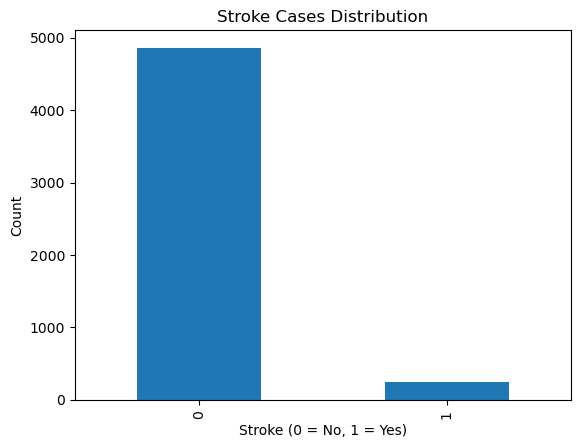

In [19]:
import matplotlib.pyplot as plt

# Distribution of the target variable
stroke_distribution = data['stroke'].value_counts()

# Plot
stroke_distribution.plot(kind='bar', title='Stroke Cases Distribution')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

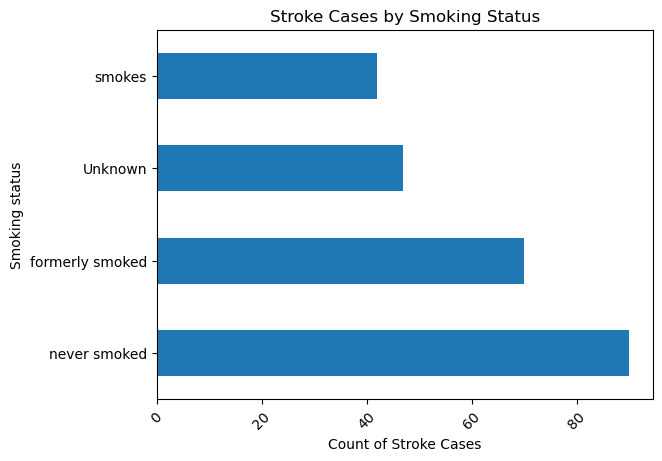

In [31]:
# Count of stroke cases by smoking status
smoking_status_counts = data[data['stroke'] == 1]['smoking_status'].value_counts()

# Bar chart
smoking_status_counts.plot(kind='barh', title='Stroke Cases by Smoking Status')
plt.xlabel('Count of Stroke Cases')
plt.ylabel('Smoking status')
plt.xticks(rotation=45)
plt.show()

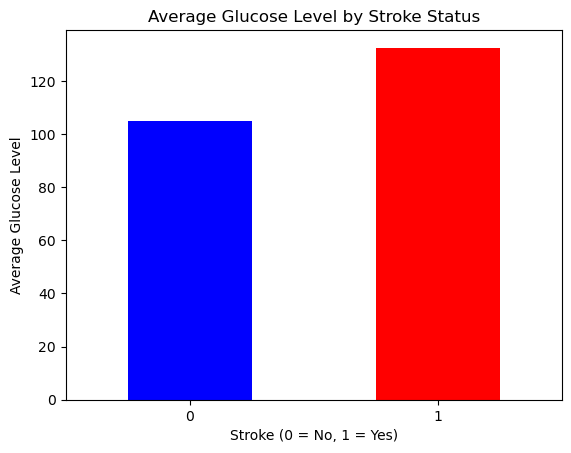

In [23]:
# Group by stroke status and calculate average glucose level
avg_glucose_by_stroke = data.groupby('stroke')['avg_glucose_level'].mean()

# Bar chart
avg_glucose_by_stroke.plot(kind='bar', title='Average Glucose Level by Stroke Status', color=['blue', 'red'])
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Average Glucose Level')
plt.xticks(rotation=0)
plt.show()

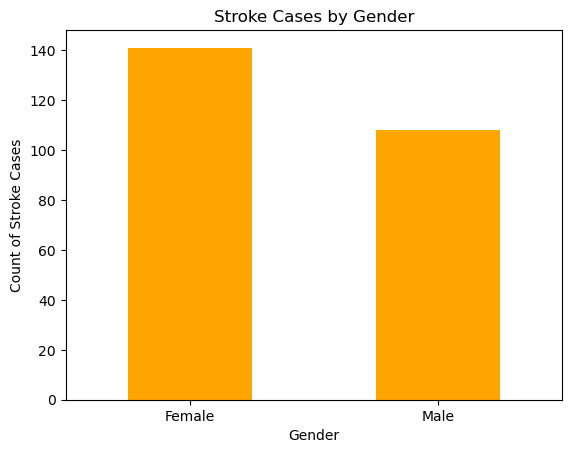

In [35]:
# Count of stroke cases by gender
gender_counts = data[data['stroke'] == 1]['gender'].value_counts()

# Bar chart
gender_counts.plot(kind='bar', title='Stroke Cases by Gender', color='orange')
plt.xlabel('Gender')
plt.ylabel('Count of Stroke Cases')
plt.xticks(rotation=0)
plt.show()

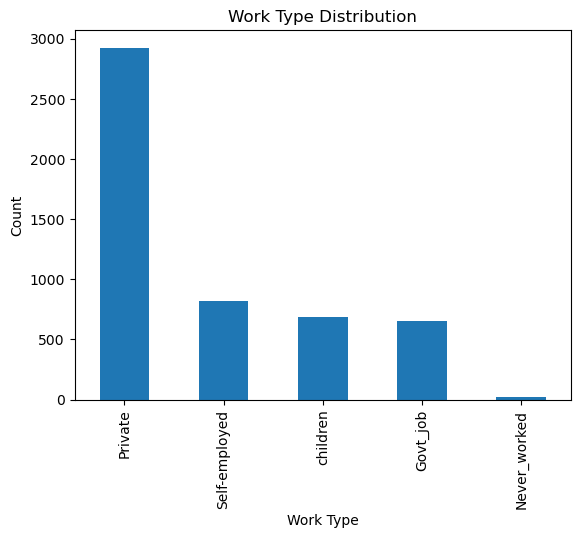

In [39]:
work_type_distribution = data['work_type'].value_counts()
work_type_distribution.plot(kind='bar', title='Work Type Distribution')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.show()

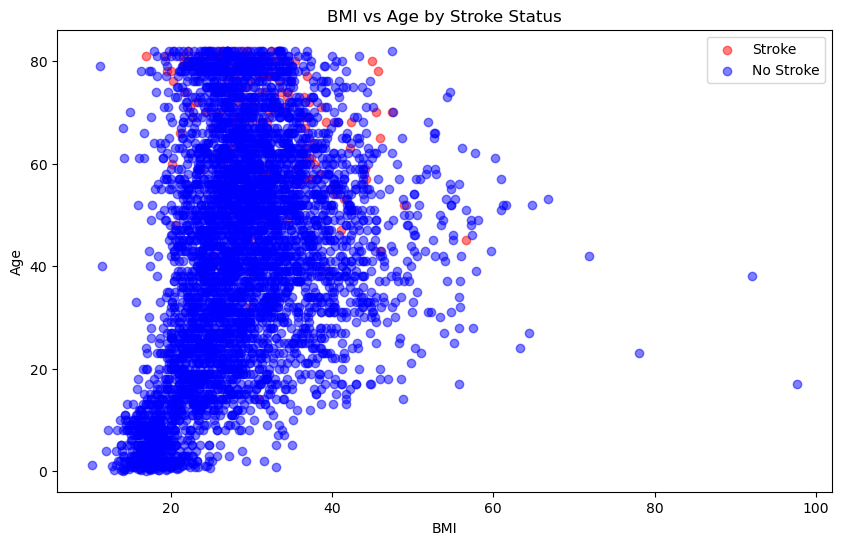

In [53]:
plt.figure(figsize=(10,6))
plt.scatter(data[data['stroke'] == 1]['bmi'], data[data['stroke'] == 1]['age'], label='Stroke', alpha=0.5, color='red')
plt.scatter(data[data['stroke'] == 0]['bmi'], data[data['stroke'] == 0]['age'], label='No Stroke', alpha=0.5, color='blue')
plt.title('BMI vs Age by Stroke Status')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.legend()
plt.show()